# CS145 Howework 2


<span style="color:red"> **Important Note:** </span>
HW2 is due on **11:59 PM PT, Oct 30 (Friday, Week 4)**. Please submit through GradeScope. 

## Print Out Your Name and UID

<span style="color:blue"> **Name: Wenxuan Liu, UID: 805152602** </span>

## Before You Start

You need to first create HW2 conda environment by the given `cs145hw2.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw2.yml
conda activate hw1
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw2.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as some important hyperparameters) that you are allowed to edit (between STRART/END YOUR CODE HERE), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import sys 
import random as rd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


If you can successfully run the code above, there will be no problem for environment setting.

## 1. Decision trees
This workbook will walk you through a decision tree. 

### 1.1 Attribute selection measures


For classification models, misclassification rate is usually used as the final performance measurement. However, for classification trees, when selecting which attribute to split, measurements people often use includes information gain, gain ratio, and Gini index. Let's investigate these different measurements through the following problem.

Note: below shows how to calculate the misclassification rate of a classification tree with $N$ total data points, $K$ classes of the value we want to predict, and $M$ leaf nodes. 

In a node $m$, $m = 1, ..., M$, let's denote the number of data points using $N_m$, and the number of data points in class k as $N_{mk}$, so the class prediction under majority vote is $j = argmax_k N_{mk}$. The misclassification rate of this node m is $R_m = 1 - \frac{N_{mj}}{N_m}$. The total misclassification rate of the tree will be $R = \frac{\sum_{m=1}^M R_m * N_m}{N}$ 


**Questions**

<span style="color:red"> Note: this question is a pure "question answer" problem. You don't need to do any coding. </span>

Suppose our dataset includes a total of 800 people with 400 males and 400 females, and our goal is to do gender classification. Consider two different possible attributes we can split on in a decision tree model. Split on the first attribute results in a node11 with 300 male and 100 female, and a node12 with 100 male and 300 female. Split on the second attribute results in in a node21 with 400 male and 200 female, and a node22 with 200 female only.

1. Which split do you prefer when the measurement is misclassifcation rate and why?
2. What is the entropy in each of these four node? 
3. What is the information gain of each of the two splits?
4. Which split do you prefer if the measurement is information gain. Do you see why it is an uncertainty or impurity measurement?
5. What is the gain ratio (normalized information gain) of each of the two splits? Which split do you prefer under this measurement. Do you get the same conclusion as information gain? 

**Your answer here:**


<span style="color:red"> Note: you can use several code cells to help you compute the results and answer the questions. Again you don't need to do any coding. </span>

<span style="color:blue"> Please type your answer here! </span>

answer 1

answer 2

answer 3

answer 4

answer 5

## 1.2 Coding decision trees

In this section, we are going to use the decision tree model to predict the the animal `type` class of the `zoo` dataset. The dataset has been preprocessed and splited into `decision-tree-train.csv` and `decision-tree-test.csv` for you.



In [7]:
from hw2code.decision_tree import DecisionTree
mytree = DecisionTree()
mytree.load_data('./data/decision-tree-train.csv','./data/decision-tree-test.csv')
# As a sanity check, we print out the size of the training data (80, 17) and testing data (21, 17)
print('Training data shape: ', mytree.train_data.shape)
print('Testing data shape:', mytree.test_data.shape)

Training data shape:  (80, 17)
Testing data shape: (21, 17)


### 1.2.1 Infomation gain

Complete the `make_tree` and `compute_info_gain` function in `decision_tree.py`. 

Train you model using `info_gain` measure to classify `type` and print the test accuracy.

In [8]:
mytree = DecisionTree()
mytree.load_data('./data/decision-tree-train.csv','./data/decision-tree-test.csv')
test_acc= 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Test accuracy is: ', test_acc)

Test accuracy is:  0


### 1.2.2 Gain ratio

Complete the `compute_gain_ratio` function in `decision_tree.py`. 

Train you model using `gain_ratio` measure to classify `type` and print the test accuracy.

In [9]:
mytree = DecisionTree()
mytree.load_data('./data/decision-tree-train.csv','./data/decision-tree-test.csv')
test_acc = 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Test accuracy is: ', test_acc)

Test accuracy is:  0


**Question**

Which measure do you like the most and why? 

**Your answer here:**


<span style="color:blue"> Please type your answer here! </span>

## 2. SVM 
This workbook will walk you through a SVM. 

### 2.1 Support vectors and decision boundary

<span style="color:red"> Note: for this question you can work entirely in the Jupyter Notebook, no need to edit any .py files. </span>

Consider classifying the following 20 data points in the 2-d plane with class label y

In [10]:
ds = pd.read_csv('data/svm-2d-data.csv')
ds.head()
# This command above will print out the first five data points
# in the dataset with column names as "x1", "x2" and "y"
# You may use command "ds" to show the entire dataset, which contains 20 data points

,x1,x2,y
0,0.52,-1.00,1
1,0.91,0.32,1
2,-1.48,1.23,1
3,0.01,1.44,1
4,-0.46,-0.37,1


Suppose by solving the dual form of the quadratic programming of svm, we can derive the $\alpha_i$’s for each data point as follows: Among $j=0,1,\cdots, 19$ (note that the index starts from 0), $\alpha_1$ = 0.5084, $\alpha_5$ = 0.4625, $\alpha_{17}$ = 0.9709, and $\alpha_j$ = 0 for all other $j$.

**Questions** 


1. Which vectors in the training points are support vectors?
2. What is the normal vector of the hyperplane $w$? 
3. What is the bias $b$? 
4. With the parameters $w$ and $b$, we can now use our SVM to do predictions. What is predicted label of $x_{new} = (2,-0.5)$? Write out your $f(x_{new})$.
5. A plot of the data points has been generated for you. Please change the `support_vec` variable such that only the support vectors are indicated by red circles. Please also fill in the code to draw the decision boundary. Does your prediction of part 4 seems right visually on the plot?



**Your answer here**


<span style="color:red"> Note: you can use several code cells to help you compute the results and answer the questions. Again you don't need to edit any .py files. </span>

<span style="color:blue"> Please type your answer here! </span>

answer 1

answer 2

answer 3

answer 4

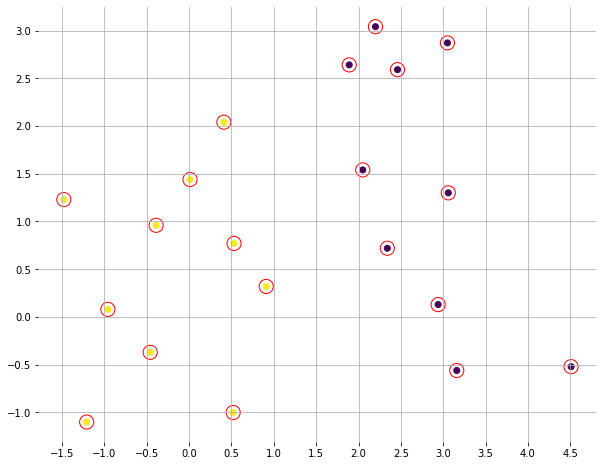

In [11]:
# answer 5
x1_range = np.arange(-2, 5, 0.5)
x2_range = np.arange(-2, 4., 0.5)

fig, ax = plt.subplots(figsize=(10, 8))
ax = fig.gca()
ax.set_xticks(x1_range)
ax.set_yticks(x2_range)
ax.grid()
ax.scatter(ds['x1'], ds['x2'], c=ds['y'])

support_vec = ds
#========================#
# STRART YOUR CODE HERE  #
#========================#

#========================#
#   END YOUR CODE HERE   #
#========================# 
ax.scatter(support_vec['x1'], support_vec['x2'], marker='o', facecolor='none', s=200, color='red')
sns.despine(ax=ax, left=True, bottom=True, offset=0)
plt.show()

## 2.2 Coding SVM

In this section, we are going to use SVM for classifying the `y` value of 4-dimensional data points. The dataset has been preprocessed and splited into `svm-train.csv` and `svm-test.csv` for you.



For this question we are going to use the `cvxopt` package to help us solve the optimization problem of SVM. You will see it in the .py files, but you don't need to any coding with it. For this question, you only need to implement the right kernel function, and your kernel matrix `K` in `svm.py` line 135 will be pluged in the cvxopt optimization problem solver.


For more information about `cvxopt` please refer to http://cvxopt.org/

In [13]:
from hw2code.svm import SVM
svm = SVM()
svm.load_data('./data/svm-train.csv', './data/svm-test.csv')
# As a sanity check, we print out the size of the training data (1098, 4) and (1098,) and testing data (274, 4) and (274,)
print('Training data shape: ', svm.train_x.shape, svm.train_y.shape)
print('Testing data shape:', svm.test_x.shape, svm.test_y.shape)

Training data shape:  (1098, 4) (1098,)
Testing data shape: (274, 4) (274,)


### 2.2.1 Linear kernel

Complete the `SVM.predict` and `linear_kernel` function in `svm.py`. 
Train a hard margin SVM and a soft margin SVM with linear kernel. Print the test accuracy for both cases.

In [14]:
svm_hard = SVM()
svm_hard.load_data('./data/svm-train.csv', './data/svm-test.csv')
hard_test_acc = 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

#========================#
#   END YOUR CODE HERE   #
#========================# 

svm_soft = SVM()
svm_soft.load_data('./data/svm-train.csv', './data/svm-test.csv')
soft_test_acc = 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Hard margin test accuracy is: ', hard_test_acc)
print('Soft margin test accuracy is: ', soft_test_acc)

Hard margin test accuracy is:  0
Soft margin test accuracy is:  0


**Questions** 


 Are these two results similar? Why or why not?

**Your Answer**

<span style="color:blue"> Please write down your answers and/or observations here </span>

### 2.2.2 Polynomial kernel

Complete the `polynomial_kernel` function in `svm.py`. 
Train a soft margin SVM with degree 3 polynomial kernel and parameter `C = 100` for the regularization term. Print the test accuracy. 

In [15]:
svm = SVM()
svm.load_data('./data/svm-train.csv', './data/svm-test.csv')
test_acc = 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Test accuracy is: ', test_acc)

Test accuracy is:  0


**Questions** 


 Is the result better than linear kernel? Why or why not?

**Your Answer**

<span style="color:blue"> Please write down your answers and/or observations here </span>

### 2.2.3 Gaussian kernel

Complete the `gaussian_kernel` function using the `gaussian_kernel_point` in `svm.py`. 
Train a soft margin SVM with Gaussian kernel and parameter `C = 100` for the regularization term. Print the test accuracy. 

In [16]:
svm = SVM()
svm.load_data('./data/svm-train.csv', './data/svm-test.csv')
test_acc = 0
#========================#
# STRART YOUR CODE HERE  #
#========================#

#========================#
#   END YOUR CODE HERE   #
#========================# 
print('Test accuracy is: ', test_acc)

Test accuracy is:  0


**Questions** 


 1. Is the result better than linear kernel and polynomial kernel? Why or why not?
 2. Which one of these four models do you like the most and why?
 3. (Bonus question, optional) Can you come up with a vectorized implementation of `gaussian_kernel` without calling `gaussian_kernel_point`? Fill that in svm.py.

**Your Answer**

<span style="color:blue"> Please write down your answers and/or observations here </span>

answer 1

answer 2

# End of Homework 2 :)
After you've finished the homework, please print out the entire `ipynb` notebook and two `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Also this time remember assign the pages to the questions on GradeScope